In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Reading Dataset

In [2]:
import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='XASQkNEL212fp8ybFcqZgV8bG9ErwvLqzJFEzwDfuFa3',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'datascience-donotdelete-pr-otpznaf0icrijh'
object_key = 'water_data1.txt'

streaming_body_1 = cos_client.get_object(Bucket=bucket, Key=object_key)['Body']

df=pd.read_csv(streaming_body_1)
df

,STATION CODE,LOCATIONS,STATE,Temp,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean,year
0,1393,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.6,6.7,7.5,203,NAN,0.1,11,27,2014
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.8,5.7,7.2,189,2,0.2,4953,8391,2014
2,1475,ZUARI AT PANCHAWADI,GOA,29.5,6.3,6.9,179,1.7,0.1,3243,5330,2014
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,29.7,5.8,6.9,64,3.8,0.5,5382,8443,2014
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,29.5,5.8,7.3,83,1.9,0.4,3428,5500,2014
...,...,...,...,...,...,...,...,...,...,...,...,...
1986,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",NAN,NAN,7.9,738,7.2,2.7,0.518,0.518,202,2003
1987,1450,"PALAR AT VANIYAMBADI WATER SUPPLY HEAD WORK, T...",NAN,29,7.5,585,6.3,2.6,0.155,0.155,315,2003
1988,1403,"GUMTI AT U/S SOUTH TRIPURA,TRIPURA",NAN,28,7.6,98,6.2,1.2,NAN,NAN,570,2003
1989,1404,"GUMTI AT D/S SOUTH TRIPURA, TRIPURA",NAN,28,7.7,91,6.5,1.3,NAN,NAN,562,2003


# Analyse the data

In [3]:
df.head()

,STATION CODE,LOCATIONS,STATE,Temp,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean,year
0,1393,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.6,6.7,7.5,203,NAN,0.1,11,27,2014
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.8,5.7,7.2,189,2,0.2,4953,8391,2014
2,1475,ZUARI AT PANCHAWADI,GOA,29.5,6.3,6.9,179,1.7,0.1,3243,5330,2014
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,29.7,5.8,6.9,64,3.8,0.5,5382,8443,2014
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,29.5,5.8,7.3,83,1.9,0.4,3428,5500,2014


In [4]:
df.describe()

,year
count,1991.000000
mean,2010.038172
std,3.057333
min,2003.000000
25%,2008.000000
50%,2011.000000
75%,2013.000000
max,2014.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1991 entries, 0 to 1990
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   STATION CODE                      1991 non-null   object
 1   LOCATIONS                         1991 non-null   object
 2   STATE                             1991 non-null   object
 3   Temp                              1991 non-null   object
 4   D.O. (mg/l)                       1991 non-null   object
 5   PH                                1991 non-null   object
 6   CONDUCTIVITY (µmhos/cm)           1991 non-null   object
 7   B.O.D. (mg/l)                     1991 non-null   object
 8   NITRATENAN N+ NITRITENANN (mg/l)  1991 non-null   object
 9   FECAL COLIFORM (MPN/100ml)        1991 non-null   object
 10  TOTAL COLIFORM (MPN/100ml)Mean    1991 non-null   object
 11  year                              1991 non-null   int64 
dtypes: int64(1), object(

In [6]:
df.shape

(1991, 12)

**Handling Missing Values**

In [7]:
df.isnull().any()

STATION CODE                        False
LOCATIONS                           False
STATE                               False
Temp                                False
D.O. (mg/l)                         False
PH                                  False
CONDUCTIVITY (µmhos/cm)             False
B.O.D. (mg/l)                       False
NITRATENAN N+ NITRITENANN (mg/l)    False
FECAL COLIFORM (MPN/100ml)          False
TOTAL COLIFORM (MPN/100ml)Mean      False
year                                False
dtype: bool

In [8]:
df.isnull().sum()

STATION CODE                        0
LOCATIONS                           0
STATE                               0
Temp                                0
D.O. (mg/l)                         0
PH                                  0
CONDUCTIVITY (µmhos/cm)             0
B.O.D. (mg/l)                       0
NITRATENAN N+ NITRITENANN (mg/l)    0
FECAL COLIFORM (MPN/100ml)          0
TOTAL COLIFORM (MPN/100ml)Mean      0
year                                0
dtype: int64

In [9]:
df.dtypes

STATION CODE                        object
LOCATIONS                           object
STATE                               object
Temp                                object
D.O. (mg/l)                         object
PH                                  object
CONDUCTIVITY (µmhos/cm)             object
B.O.D. (mg/l)                       object
NITRATENAN N+ NITRITENANN (mg/l)    object
FECAL COLIFORM (MPN/100ml)          object
TOTAL COLIFORM (MPN/100ml)Mean      object
year                                 int64
dtype: object

In [10]:
df['Temp']=pd.to_numeric(df['Temp'],errors='coerce')
df['D.O. (mg/l)']=pd.to_numeric(df['D.O. (mg/l)'],errors='coerce')
df['PH']=pd.to_numeric(df['PH'],errors='coerce')
df['B.O.D. (mg/l)']=pd.to_numeric(df['B.O.D. (mg/l)'],errors='coerce')
df['CONDUCTIVITY (µmhos/cm)']=pd.to_numeric(df['CONDUCTIVITY (µmhos/cm)'],errors='coerce')
df['NITRATENAN N+ NITRITENANN (mg/l)']=pd.to_numeric(df['NITRATENAN N+ NITRITENANN (mg/l)'],errors='coerce')
df['TOTAL COLIFORM (MPN/100ml)Mean']=pd.to_numeric(df['TOTAL COLIFORM (MPN/100ml)Mean'],errors='coerce')
df.dtypes

STATION CODE                         object
LOCATIONS                            object
STATE                                object
Temp                                float64
D.O. (mg/l)                         float64
PH                                  float64
CONDUCTIVITY (µmhos/cm)             float64
B.O.D. (mg/l)                       float64
NITRATENAN N+ NITRITENANN (mg/l)    float64
FECAL COLIFORM (MPN/100ml)           object
TOTAL COLIFORM (MPN/100ml)Mean      float64
year                                  int64
dtype: object

In [11]:
df.isnull().sum()

STATION CODE                          0
LOCATIONS                             0
STATE                                 0
Temp                                 92
D.O. (mg/l)                          31
PH                                    8
CONDUCTIVITY (µmhos/cm)              25
B.O.D. (mg/l)                        43
NITRATENAN N+ NITRITENANN (mg/l)    225
FECAL COLIFORM (MPN/100ml)            0
TOTAL COLIFORM (MPN/100ml)Mean      132
year                                  0
dtype: int64

In [12]:
df['Temp'].fillna(df['Temp'].mean(),inplace=True)
df['D.O. (mg/l)'].fillna(df['D.O. (mg/l)'].mean(),inplace=True)
df['PH'].fillna(df['PH'].mean(),inplace=True)
df['CONDUCTIVITY (µmhos/cm)'].fillna(df['CONDUCTIVITY (µmhos/cm)'].mean(),inplace=True)
df['B.O.D. (mg/l)'].fillna(df['B.O.D. (mg/l)'].mean(),inplace=True)
df['NITRATENAN N+ NITRITENANN (mg/l)'].fillna(df['NITRATENAN N+ NITRITENANN (mg/l)'].mean(),inplace=True)
df['TOTAL COLIFORM (MPN/100ml)Mean'].fillna(df['TOTAL COLIFORM (MPN/100ml)Mean'].mean(),inplace=True)

In [13]:
df.drop(["FECAL COLIFORM (MPN/100ml)"],axis=1,inplace=True)

In [14]:
df=df.rename(columns = {'D.O. (mg/l)': 'do'})
df=df.rename(columns = {'CONDUCTIVITY (µmhos/cm)': 'co'})
df=df.rename(columns = {'B.O.D. (mg/l)': 'bod'})
df=df.rename(columns = {'NITRATENAN N+ NITRITENANN (mg/l)': 'na'})
df=df.rename(columns = {'TOTAL COLIFORM (MPN/100ml)Mean': 'tc'})
df=df.rename(columns = {'STATION CODE': 'station'})
df=df.rename(columns = {'LOCATIONS': 'location'})
df=df.rename(columns = {'STATE': 'state'})
df=df.rename(columns = {'PH': 'ph'})

**Water Quality Index (WQI) Calculation**

In [15]:
#calculation of pH
df['npH']=df.ph.apply(lambda x: (100 if(8.5>=x>=7)
                                else(80 if(8.6>=x>=8.5) or (6.9>=x>=6.8)
                                  else (60 if(8.8>=x>=8.6) or (6.8>=x>=6.7)
                                      else(40 if(9>=x>=8.8) or (6.7>=x>=6.5)
                                          else 0)))))

In [16]:
#calculation of dissolved oxygen
df['ndo']=df.do.apply(lambda x: (100 if(x>=6)
                                else(80 if(6>=x>=5.1)
                                  else (60 if(5>=x>=4.1)
                                      else(40 if(4>=x>=3)
                                          else 0)))))

In [17]:
#calculation of total coliform
df['nco']=df.tc.apply(lambda x: (100 if(5>=x>=0)
                                else(80 if(50>=x>=5)
                                  else (60 if(500>=x>=50)
                                      else(40 if(10000>=x>=500)
                                          else 0)))))

In [18]:
#calculation of B.D.O
df['nbdo']=df.bod.apply(lambda x:(100 if(3>=x>=0)
                                else(80 if(6>=x>=3)
                                  else (60 if(80>=x>=6)
                                      else(40 if(125>=x>=80)
                                          else 0)))))

In [19]:
#calculation of electric conductivity
df['nec']=df.co.apply(lambda x:(100 if(75>=x>=0)
                                else(80 if(150>=x>=75)
                                  else (60 if(225>=x>=150)
                                      else(40 if(300>=x>=225)
                                          else 0)))))

In [20]:
#calculation of nitrate
df['nna']=df.na.apply(lambda x:(100 if(20>=x>=0)
                                else(80 if(50>=x>=20)
                                  else (60 if(100>=x>=50)
                                      else(40 if(200>=x>=100)
                                          else 0)))))

In [21]:
#Calculation of Water Quality Index WQI
df['wph']=df.npH*0.165
df['wdo']=df.ndo*0.281
df['wbdo']=df.nbdo*0.234
df['wec']=df.nec*0.009
df['wna']=df.nna*0.028
df['wco']=df.nco*0.281
df['wqi']=df.wph+df.wdo+df.wbdo+df.wec+df.wna+df.wco
df

,station,location,state,Temp,do,ph,co,bod,na,tc,...,nbdo,nec,nna,wph,wdo,wbdo,wec,wna,wco,wqi
0,1393,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.600000,6.7,7.5,203.0,6.940049,0.100000,27.0,...,60,60,100,16.5,28.10,14.04,0.54,2.8,22.48,84.46
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.800000,5.7,7.2,189.0,2.000000,0.200000,8391.0,...,100,60,100,16.5,22.48,23.40,0.54,2.8,11.24,76.96
2,1475,ZUARI AT PANCHAWADI,GOA,29.500000,6.3,6.9,179.0,1.700000,0.100000,5330.0,...,100,60,100,13.2,28.10,23.40,0.54,2.8,11.24,79.28
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,29.700000,5.8,6.9,64.0,3.800000,0.500000,8443.0,...,80,100,100,13.2,22.48,18.72,0.90,2.8,11.24,69.34
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,29.500000,5.8,7.3,83.0,1.900000,0.400000,5500.0,...,100,80,100,16.5,22.48,23.40,0.72,2.8,11.24,77.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1986,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",NAN,26.209814,7.9,738.0,7.2,2.700000,0.518000,202.0,...,100,100,100,0.0,28.10,23.40,0.90,2.8,16.86,72.06
1987,1450,"PALAR AT VANIYAMBADI WATER SUPPLY HEAD WORK, T...",NAN,29.000000,7.5,585.0,6.3,2.600000,0.155000,315.0,...,100,100,100,0.0,28.10,23.40,0.90,2.8,16.86,72.06
1988,1403,"GUMTI AT U/S SOUTH TRIPURA,TRIPURA",NAN,28.000000,7.6,98.0,6.2,1.200000,1.623079,570.0,...,100,100,100,0.0,28.10,23.40,0.90,2.8,11.24,66.44
1989,1404,"GUMTI AT D/S SOUTH TRIPURA, TRIPURA",NAN,28.000000,7.7,91.0,6.5,1.300000,1.623079,562.0,...,100,100,100,0.0,28.10,23.40,0.90,2.8,11.24,66.44


In [22]:
#Calculation of overall WQI for each year
average = df.groupby('year')['wqi'].mean()
average.head()

year
2003    66.239545
2004    61.290000
2005    73.762689
2006    72.909714
2007    74.233000
Name: wqi, dtype: float64

# Data Visualization


**Univariate analysis**


In [23]:
df.head()

,station,location,state,Temp,do,ph,co,bod,na,tc,...,nbdo,nec,nna,wph,wdo,wbdo,wec,wna,wco,wqi
0,1393,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.6,6.7,7.5,203.0,6.940049,0.1,27.0,...,60,60,100,16.5,28.10,14.04,0.54,2.8,22.48,84.46
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.8,5.7,7.2,189.0,2.000000,0.2,8391.0,...,100,60,100,16.5,22.48,23.40,0.54,2.8,11.24,76.96
2,1475,ZUARI AT PANCHAWADI,GOA,29.5,6.3,6.9,179.0,1.700000,0.1,5330.0,...,100,60,100,13.2,28.10,23.40,0.54,2.8,11.24,79.28
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,29.7,5.8,6.9,64.0,3.800000,0.5,8443.0,...,80,100,100,13.2,22.48,18.72,0.90,2.8,11.24,69.34
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,29.5,5.8,7.3,83.0,1.900000,0.4,5500.0,...,100,80,100,16.5,22.48,23.40,0.72,2.8,11.24,77.14


/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Temp', ylabel='Density'>

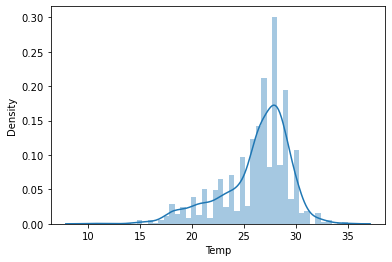

In [24]:
#age using distribution plot->used for checking assymtery of curve
sns.distplot(df.Temp)


/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Temp'>

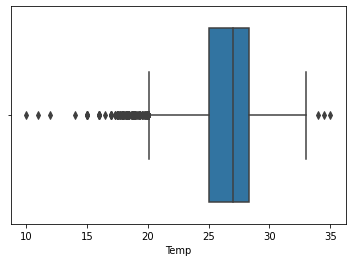

In [25]:
sns.boxplot(df.Temp)


/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='year', ylabel='count'>

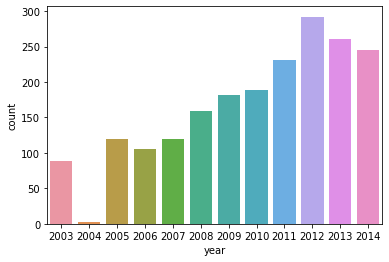

In [26]:
sns.countplot(df.year)


/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ph', ylabel='Density'>

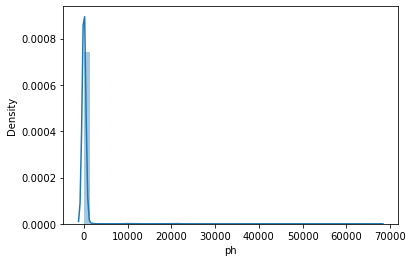

In [27]:
sns.distplot(df.ph)


/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='npH', ylabel='count'>

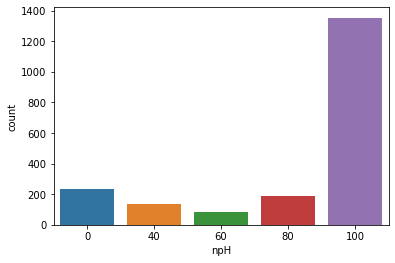

In [28]:
sns.countplot(df.npH)


/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='nbdo', ylabel='count'>

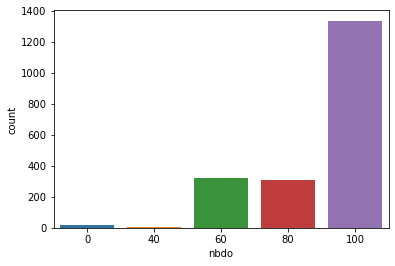

In [29]:
sns.countplot(df.nbdo)


/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='bod', ylabel='Density'>

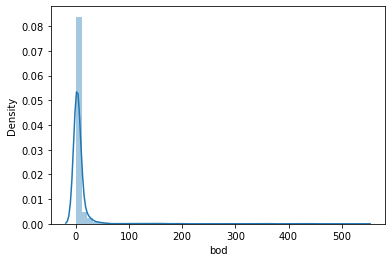

In [30]:
sns.distplot(df.bod)


**Bivariate analysis**


/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ph', ylabel='do'>

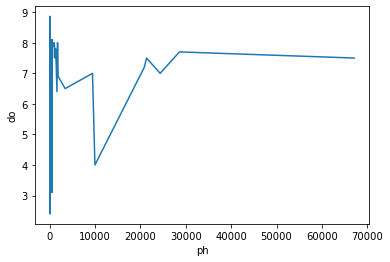

In [31]:
sns.lineplot(df.ph,df.do)


/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Temp', ylabel='ph'>

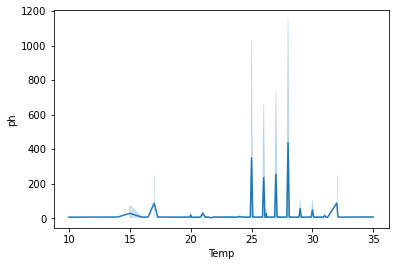

In [32]:
sns.lineplot(df.Temp,df.ph)


/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Temp', ylabel='do'>

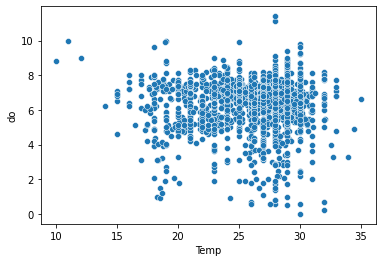

In [33]:
sns.scatterplot(df.Temp,df.do)


**Multivariate analysis**


In [34]:
# sns.pairplot(df)

array([[<AxesSubplot:title={'center':'Temp'}>,
        <AxesSubplot:title={'center':'do'}>,
        <AxesSubplot:title={'center':'ph'}>,
        <AxesSubplot:title={'center':'co'}>,
        <AxesSubplot:title={'center':'bod'}>],
       [<AxesSubplot:title={'center':'na'}>,
        <AxesSubplot:title={'center':'tc'}>,
        <AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'npH'}>,
        <AxesSubplot:title={'center':'ndo'}>],
       [<AxesSubplot:title={'center':'nco'}>,
        <AxesSubplot:title={'center':'nbdo'}>,
        <AxesSubplot:title={'center':'nec'}>,
        <AxesSubplot:title={'center':'nna'}>,
        <AxesSubplot:title={'center':'wph'}>],
       [<AxesSubplot:title={'center':'wdo'}>,
        <AxesSubplot:title={'center':'wbdo'}>,
        <AxesSubplot:title={'center':'wec'}>,
        <AxesSubplot:title={'center':'wna'}>,
        <AxesSubplot:title={'center':'wco'}>],
       [<AxesSubplot:title={'center':'wqi'}>, <AxesSubplot:>,
        <AxesSu

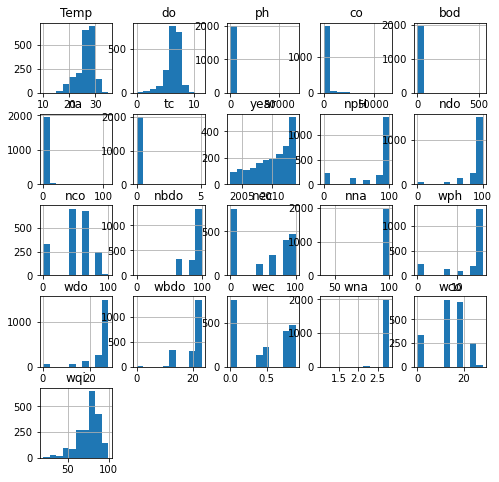

In [35]:
df.hist(figsize=(8,8))

<AxesSubplot:>

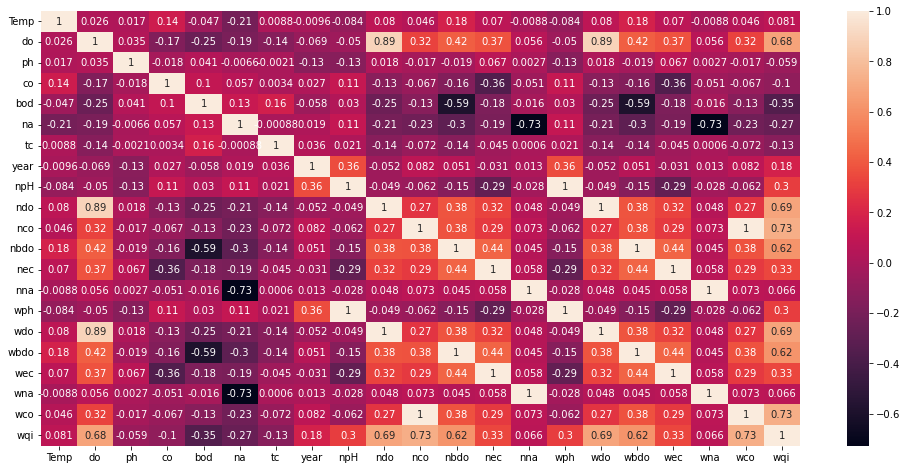

In [36]:
plt.figure(figsize=(17,8))
sns.heatmap(df.corr(),annot=True)


# Model Training

**Splitting Dependent and Independent Columns**

In [37]:
df.head()
df.drop(['location','station','state'],axis =1,inplace=True)

In [38]:
df.head()

,Temp,do,ph,co,bod,na,tc,year,npH,ndo,...,nbdo,nec,nna,wph,wdo,wbdo,wec,wna,wco,wqi
0,30.6,6.7,7.5,203.0,6.940049,0.1,27.0,2014,100,100,...,60,60,100,16.5,28.10,14.04,0.54,2.8,22.48,84.46
1,29.8,5.7,7.2,189.0,2.000000,0.2,8391.0,2014,100,80,...,100,60,100,16.5,22.48,23.40,0.54,2.8,11.24,76.96
2,29.5,6.3,6.9,179.0,1.700000,0.1,5330.0,2014,80,100,...,100,60,100,13.2,28.10,23.40,0.54,2.8,11.24,79.28
3,29.7,5.8,6.9,64.0,3.800000,0.5,8443.0,2014,80,80,...,80,100,100,13.2,22.48,18.72,0.90,2.8,11.24,69.34
4,29.5,5.8,7.3,83.0,1.900000,0.4,5500.0,2014,100,80,...,100,80,100,16.5,22.48,23.40,0.72,2.8,11.24,77.14


In [39]:
x=df.iloc[:,1:7].values


In [40]:
x.shape

(1991, 6)

In [66]:
y=df.iloc[:,-1:].values
y.shape
y

array([[84.46],
       [76.96],
       [79.28],
       ...,
       [66.44],
       [66.44],
       [66.44]])

In [42]:
print(x)

[[6.70000000e+00 7.50000000e+00 2.03000000e+02 6.94004877e+00
  1.00000000e-01 2.70000000e+01]
 [5.70000000e+00 7.20000000e+00 1.89000000e+02 2.00000000e+00
  2.00000000e-01 8.39100000e+03]
 [6.30000000e+00 6.90000000e+00 1.79000000e+02 1.70000000e+00
  1.00000000e-01 5.33000000e+03]
 ...
 [7.60000000e+00 9.80000000e+01 6.20000000e+00 1.20000000e+00
  1.62307871e+00 5.70000000e+02]
 [7.70000000e+00 9.10000000e+01 6.50000000e+00 1.30000000e+00
  1.62307871e+00 5.62000000e+02]
 [7.60000000e+00 1.10000000e+02 5.70000000e+00 1.10000000e+00
  1.62307871e+00 5.46000000e+02]]


In [43]:
print(y)

[[84.46]
 [76.96]
 [79.28]
 ...
 [66.44]
 [66.44]
 [66.44]]


In [44]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state=10)

**Random_Forest_Regression**


In [45]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [46]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)

/tmp/wsuser/ipykernel_593/3869103801.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(x_train, y_train)


# Model Evaluation

In [47]:
from sklearn import metrics
print('MAE:',metrics.mean_absolute_error(y_test,y_pred))
print('MSE:',metrics.mean_squared_error(y_test,y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))


MAE: 0.9872080200501312
MSE: 5.555095879699248
RMSE: 2.3569250899634566


In [48]:
metrics.r2_score(y_test, y_pred)


0.96971918125809

# Save The Model

In [49]:
import pickle
pickle.dump(regressor,open('wqi.pkl', 'wb'))
model = pickle.load(open('wqi.pkl','rb'))

In [50]:
!pip install -U ibm-watson-machine-learning

In [51]:
from ibm_watson_machine_learning import APIClient

In [52]:
wml_credentials = {
    "apikey":"YdvedR02ZwG55_f0h2MOZ6AqnfX8cUoa5k9vNev56q8X",
    "url":"https://eu-gb.ml.cloud.ibm.com"
}

In [53]:
wml_client = APIClient(wml_credentials)
wml_client.spaces.list()

Note: 'limit' is not provided. Only first 50 records will be displayed if the number of records exceed 50
------------------------------------  ------------  ------------------------
ID                                    NAME          CREATED
204e3306-09a2-41c4-8bc9-5b4f87e38591  water         2022-11-13T07:06:38.482Z
faf55eb6-1dfb-49a3-84b3-16773d04ed61  Smartinternz  2022-02-26T12:45:37.802Z
------------------------------------  ------------  ------------------------


In [54]:
space_id = "204e3306-09a2-41c4-8bc9-5b4f87e38591"

In [55]:
wml_client.set.default_space(space_id)

'SUCCESS'

In [56]:
wml_client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12      020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt22.2-py3.10        125b6d9

In [57]:
MODEL_NAME = 'Water-Quality'
DEPLOYMENT_NAME = 'water-quality-prediction'
POWER_MODEL = model

In [58]:
software_spec_uid = wml_client.software_specifications.get_id_by_name('runtime-22.1-py3.9')

In [59]:
model_props = {
    wml_client.repository.ModelMetaNames.NAME: MODEL_NAME, 
    wml_client.repository.ModelMetaNames.TYPE: 'scikit-learn_1.0', 
    wml_client.repository.ModelMetaNames.SOFTWARE_SPEC_UID: software_spec_uid 
}

In [60]:
model_details = wml_client.repository.store_model(
    model=POWER_MODEL, 
    meta_props=model_props, 
    training_data=x_train, 
    training_target=y_train
)

Deployment creation failed. Error: 400. {"trace":"b9a693af8765f26b0b178184737e5085","errors":[{"code":"asset_not_found","message":"The asset: '7962b373-083a-4641-82f0-d4e8f336409f' could not be found."}]}


In [61]:
model_details

{'entity': {'hybrid_pipeline_software_specs': [],
  'label_column': 'l0',
  'schemas': {'input': [{'fields': [{'name': 'f0', 'type': 'float'},
      {'name': 'f1', 'type': 'float'},
      {'name': 'f2', 'type': 'float'},
      {'name': 'f3', 'type': 'float'},
      {'name': 'f4', 'type': 'float'},
      {'name': 'f5', 'type': 'float'}],
     'id': '1',
     'type': 'struct'}],
   'output': []},
  'software_spec': {'id': '12b83a17-24d8-5082-900f-0ab31fbfd3cb',
   'name': 'runtime-22.1-py3.9'},
  'type': 'scikit-learn_1.0'},
 'metadata': {'created_at': '2022-11-13T07:22:31.015Z',
  'id': '640c354f-564b-4a11-a158-a959b7383a35',
  'modified_at': '2022-11-13T07:22:34.318Z',
  'name': 'Water-Quality',
  'owner': 'IBMid-55000865E5',
  'resource_key': 'f9d92997-1a22-413f-be17-796d375a4389',
  'space_id': '204e3306-09a2-41c4-8bc9-5b4f87e38591'},
 'system': {'warnings': []}}

In [62]:
model_id = wml_client.repository.get_model_id(model_details)
model_id

'640c354f-564b-4a11-a158-a959b7383a35'

In [63]:
#set meta
deployment_props={
    wml_client.deployments.ConfigurationMetaNames.NAME:DEPLOYMENT_NAME,
    wml_client.deployments.ConfigurationMetaNames.ONLINE:{}
}
deployment_props

{'name': 'water-quality-prediction', 'online': {}}

In [65]:
#DEPLOY
deployment=wml_client.deployments.create(
    artifact_uid=model_id,
    meta_props={'name': 'water-quality-deploy', 'online': {}}
)



#######################################################################################

Synchronous deployment creation for uid: '640c354f-564b-4a11-a158-a959b7383a35' started

#######################################################################################


initializing
Note: online_url is deprecated and will be removed in a future release. Use serving_urls instead.

ready


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='1729ff17-6cec-4697-afee-e59bb6cc3c9c'
------------------------------------------------------------------------------------------------


